<a href="https://colab.research.google.com/github/arturomf94/estool/blob/master/simple_example_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arturomf94/estool.git
import os
os.chdir('estool')

Cloning into 'estool'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 633 (delta 136), reused 256 (delta 63), pack-reused 298
Receiving objects: 100% (633/633), 4.85 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (244/244), done.


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 163kB 2.8MB/s 
     |████████████████████████████████| 17.0MB 137kB/s 
     |████████████████████████████████| 245kB 42.2MB/s 
     |████████████████████████████████| 16.1MB 139kB/s 
     |████████████████████████████████| 450kB 30.0MB/s 
     |████████████████████████████████| 48.9MB 47kB/s 
     |████████████████████████████████| 184kB 55.0MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
  Created wheel for gym: filename=gym-0.9.4-cp36-none-any.whl size=215484 sha256=49bb62d423aade5ca7a48c86c647ac7cd9113c7d7451585104b55f98fd3a03f0
  Stored in directory: /root/.cache/pip/wheels/2f/ae/a0/126678adc5f1f8905309a4712ea29537999787f610edbcb0a4
  Created wheel for pybullet: filename=pybullet-1.6.3-cp36-cp36m-linux_x86_64.whl size=26924138 sha256=3f0f8a563ddfb2f61898a694b9f2ad241237259b9be34e06d9d473c850f4f1c2
  Stored in directory: /root/.cache/pip/wheels/58/78/7f/fb2809c07e1da5117eaff2ada2f093faa882ff4393d2e7bab6
  Created wheel for bayesi

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES, Pyswarms

In [0]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function"""
  x = np.copy(x)
  #x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

def rastrigin_shifted(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

def schaffer(x):
    """ Schaffer function"""
    x = np.copy(x)
    #x -= 10.0
    N = len(x)
    s = x[0:N - 1]**2 + x[1:N]**2
    return -sum(s**0.25 * (np.sin(50 * s**0.1)**2 + 1))
  
def schaffer_shifted(x):
    """ Schaffer function shifted"""
    x = np.copy(x)
    x -= 10.0
    N = len(x)
    s = x[0:N - 1]**2 + x[1:N]**2
    return -sum(s**0.25 * (np.sin(50 * s**0.1)**2 + 1))

In [0]:
fit_func = schaffer_shifted

In [0]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 5000 # run each solver for 5000 generations.

In [0]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history


In [26]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(fit_func(x))

This is F(0):
-10000.0


In [27]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print("This is F(10):")
print(fit_func(x))


This is F(10):
-0.0


In [0]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=1,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [61]:
ga_history = test_solver(ga)

fitness at iteration 100 -334.732346848319
fitness at iteration 200 -229.80753059847817
fitness at iteration 300 -192.05205381620718
fitness at iteration 400 -175.40906020503016
fitness at iteration 500 -165.12054118916834
fitness at iteration 600 -152.8355322957429
fitness at iteration 700 -138.04246298610715
fitness at iteration 800 -138.04246298610715
fitness at iteration 900 -129.41608159417245
fitness at iteration 1000 -121.77683252763867
fitness at iteration 1100 -114.39764301073383
fitness at iteration 1200 -112.39074762512797
fitness at iteration 1300 -109.20897482484433
fitness at iteration 1400 -102.22958580620563
fitness at iteration 1500 -98.92102275961565
fitness at iteration 1600 -94.61435425005784
fitness at iteration 1700 -90.27785365338812
fitness at iteration 1800 -86.10878185173843
fitness at iteration 1900 -83.64722178500581
fitness at iteration 2000 -76.0280455101405
fitness at iteration 2100 -76.0280455101405
fitness at iteration 2200 -72.78503195236325
fitness at

In [62]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 1
          )


(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=217080, Wed Nov  6 18:17:06 2019)


In [63]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -372.92499274915514
fitness at iteration 200 -371.1291946514233
fitness at iteration 300 -371.045160109398
fitness at iteration 400 -371.0327362106725
fitness at iteration 500 -371.0287221432075
fitness at iteration 600 -371.0254422842018
fitness at iteration 700 -371.02439108762695
fitness at iteration 800 -371.0238730029961
fitness at iteration 900 -371.0230496726076
fitness at iteration 1000 -371.0227458692442
fitness at iteration 1100 -371.0224627001855
fitness at iteration 1200 -371.0222534758974
fitness at iteration 1300 -371.0222284590484
fitness at iteration 1400 -371.0222273000362
fitness at iteration 1500 -371.0222272911976
fitness at iteration 1600 -371.0222272911834
fitness at iteration 1700 -371.02222729118324
fitness at iteration 1800 -371.0222272911832
fitness at iteration 1900 -371.0222272911831
fitness at iteration 2000 -371.0222272911831
fitness at iteration 2100 -371.0222272911831
fitness at iteration 2200 -371.0222272911831
fitness at iterat

In [0]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=1,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [65]:
oes_history = test_solver(oes)

fitness at iteration 100 -472.43350688685257
fitness at iteration 200 -431.9372906305363
fitness at iteration 300 -365.7131643217172
fitness at iteration 400 -281.2637135835972
fitness at iteration 500 -226.11682551068463
fitness at iteration 600 -194.01947795101873
fitness at iteration 700 -185.39789457598093
fitness at iteration 800 -172.4069250555008
fitness at iteration 900 -165.24134952016698
fitness at iteration 1000 -157.17210950466492
fitness at iteration 1100 -155.2585780901066
fitness at iteration 1200 -151.80148476905532
fitness at iteration 1300 -150.6683676481102
fitness at iteration 1400 -145.470620475471
fitness at iteration 1500 -143.35073864463203
fitness at iteration 1600 -139.7839979881014
fitness at iteration 1700 -138.20538817866785
fitness at iteration 1800 -132.82632860455155
fitness at iteration 1900 -132.4136044453893
fitness at iteration 2000 -132.29687564565228
fitness at iteration 2100 -128.83957832512843
fitness at iteration 2200 -128.83957832512843
fitness

In [0]:
global_pso = Pyswarms(num_params = NPARAMS,
            popsize = NPOPULATION,
            sigma_init = 1,
            weight_decay = 0.00,
            communication_topology = 'global')

In [67]:
global_pso_history = test_solver(global_pso)

fitness at iteration 100 -379.0958095418429
fitness at iteration 200 -376.49176168753786
fitness at iteration 300 -375.72857830509173
fitness at iteration 400 -375.62876836199365
fitness at iteration 500 -375.41533708844185
fitness at iteration 600 -375.37318526040497
fitness at iteration 700 -375.34375657654573
fitness at iteration 800 -375.34108466113537
fitness at iteration 900 -375.3308145492524
fitness at iteration 1000 -375.33081275350133
fitness at iteration 1100 -375.27853176444205
fitness at iteration 1200 -375.2785306459522
fitness at iteration 1300 -375.2535580042918
fitness at iteration 1400 -375.2535580042222
fitness at iteration 1500 -375.25355800422216
fitness at iteration 1600 -375.25355800422216
fitness at iteration 1700 -375.25355800422216
fitness at iteration 1800 -375.25355800422216
fitness at iteration 1900 -375.25355800422216
fitness at iteration 2000 -375.25355800422216
fitness at iteration 2100 -375.25355800422216
fitness at iteration 2200 -375.25355800422216
fi

In [0]:
local_pso = Pyswarms(num_params = NPARAMS,
            popsize = NPOPULATION,
            sigma_init = 1,
            weight_decay = 0.00,
            communication_topology = 'local')

In [69]:
local_pso_history = test_solver(local_pso)

fitness at iteration 100 -423.9066441901697
fitness at iteration 200 -423.6864592303845
fitness at iteration 300 -423.686429515995
fitness at iteration 400 -423.6864295156993
fitness at iteration 500 -423.6864295156993
fitness at iteration 600 -423.6864295156993
fitness at iteration 700 -423.6864295156993
fitness at iteration 800 -423.6864295156993
fitness at iteration 900 -423.6864295156993
fitness at iteration 1000 -423.6864295156993
fitness at iteration 1100 -423.6864295156993
fitness at iteration 1200 -423.6864295156993
fitness at iteration 1300 -423.6864295156993
fitness at iteration 1400 -423.6864295156993
fitness at iteration 1500 -423.6864295156993
fitness at iteration 1600 -423.6864295156993
fitness at iteration 1700 -423.6864295156993
fitness at iteration 1800 -423.6864295156993
fitness at iteration 1900 -423.6864295156993
fitness at iteration 2000 -423.6864295156993
fitness at iteration 2100 -423.6864295156993
fitness at iteration 2200 -423.6864295156993
fitness at iteration

In [0]:
random_pso = Pyswarms(num_params = NPARAMS,
            popsize = NPOPULATION,
            sigma_init = 1,
            weight_decay = 0.00,
            communication_topology = 'random')

In [71]:
random_pso_history = test_solver(random_pso)

fitness at iteration 100 -385.49760630951596
fitness at iteration 200 -374.21316102504466
fitness at iteration 300 -372.34489482861693
fitness at iteration 400 -371.7902915635856
fitness at iteration 500 -371.48420566872375
fitness at iteration 600 -371.3504753345432
fitness at iteration 700 -371.2654294179186
fitness at iteration 800 -371.2090190521544
fitness at iteration 900 -371.17532820371537
fitness at iteration 1000 -371.1454651216299
fitness at iteration 1100 -371.12501681059103
fitness at iteration 1200 -371.10734333369015
fitness at iteration 1300 -371.09586661923066
fitness at iteration 1400 -371.0823218628782
fitness at iteration 1500 -371.07549951640203
fitness at iteration 1600 -371.0690990402071
fitness at iteration 1700 -371.0632021767163
fitness at iteration 1800 -371.0586213872736
fitness at iteration 1900 -371.05391515387464
fitness at iteration 2000 -371.0504594140741
fitness at iteration 2100 -371.048432210803
fitness at iteration 2200 -371.046319220671
fitness at 

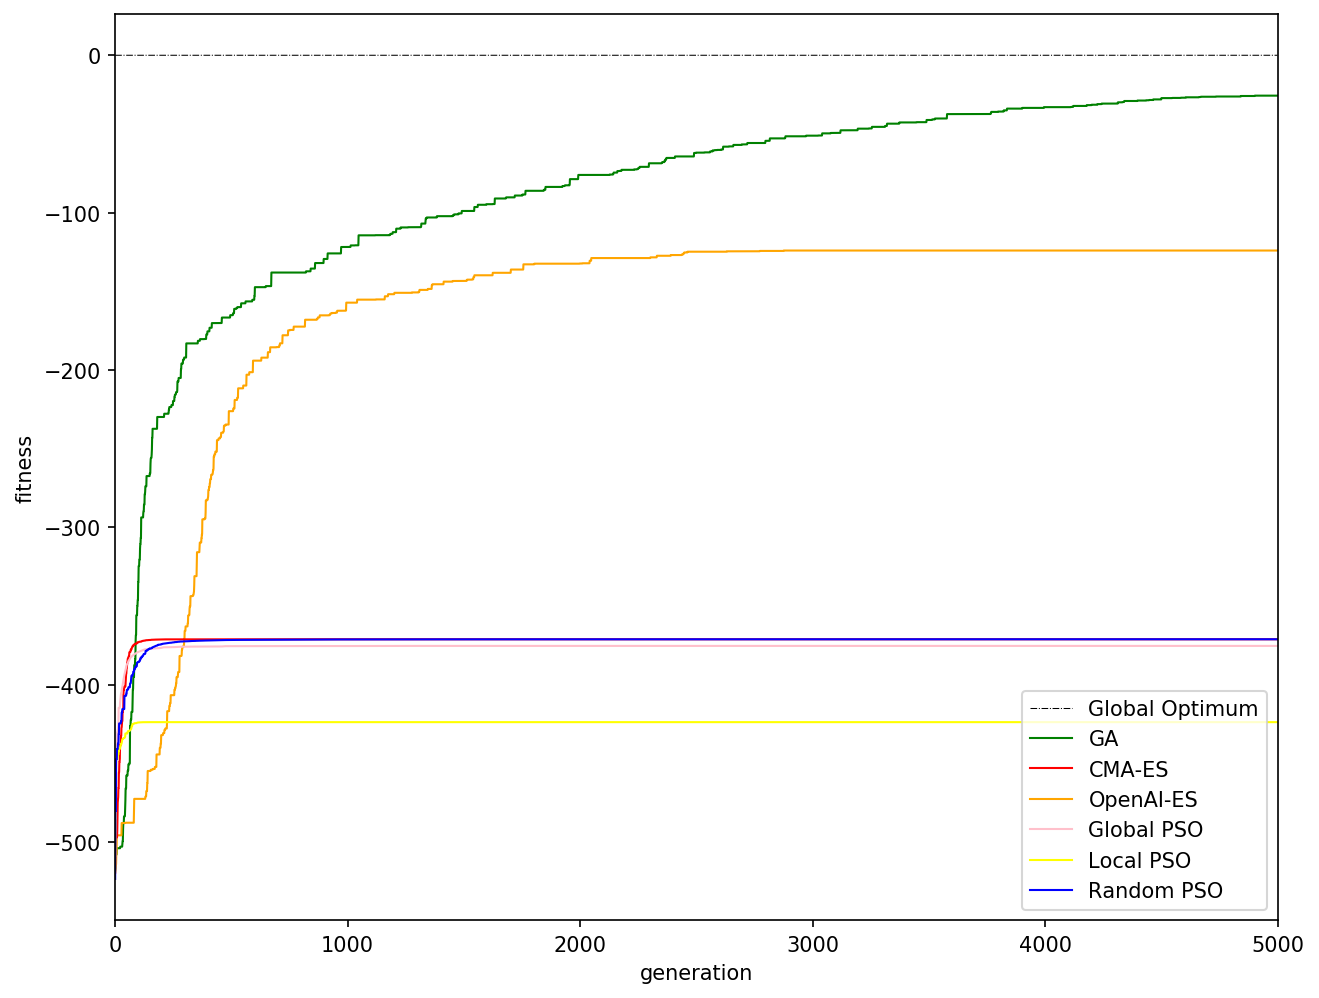

In [72]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(10,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')
global_pso_line, = plt.plot(global_pso_history, color="pink", linewidth=1.0, linestyle="-", label='Global PSO')
local_pso_line, = plt.plot(local_pso_history, color="yellow", linewidth=1.0, linestyle="-", label='Local PSO')
random_pso_line, = plt.plot(random_pso_history, color="blue", linewidth=1.0, linestyle="-", label='Random PSO')




plt.legend(handles=[optimum_line, ga_line, cma_line, oes_line, global_pso_line,local_pso_line,random_pso_line], loc=4)

# Set x limits
plt.xlim(0,MAX_ITERATION)
#plt.ylim(-1.1,0.01)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()